# **Logistic Regression**

In [37]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# The Data
Let's start by reading in the titanic file into df

In [38]:
df=sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [39]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

# **EDA**

<AxesSubplot:>

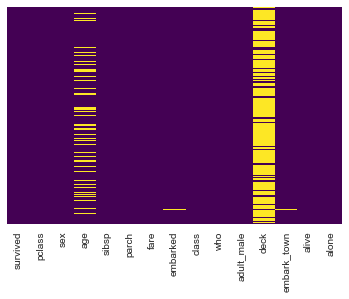

In [40]:
# you can use heatmap to see the missing values
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

We will drop deck column as it contain 80% of missing values,

<AxesSubplot:xlabel='survived', ylabel='count'>

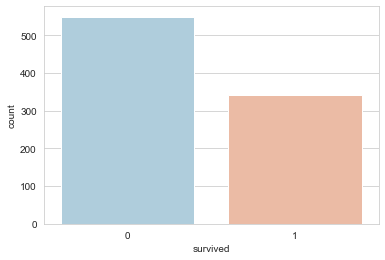

In [41]:
sns.set_style('whitegrid')
sns.countplot(x='survived',data=df,palette='RdBu_r')

<AxesSubplot:xlabel='survived', ylabel='count'>

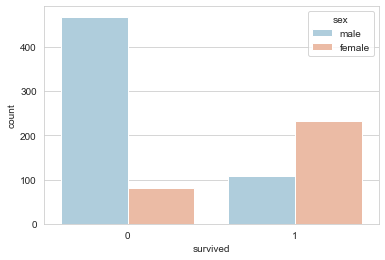

In [42]:
sns.set_style('whitegrid')
sns.countplot(x='survived',hue='sex',data=df,palette='RdBu_r')

<AxesSubplot:xlabel='survived', ylabel='count'>

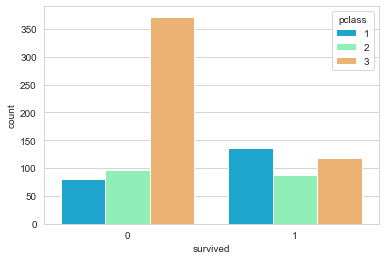

In [43]:
sns.set_style('whitegrid')
sns.countplot(x='survived',hue='pclass',data=df,palette='rainbow')

c:\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age'>

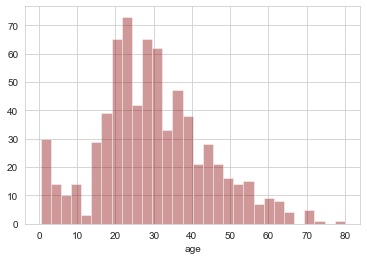

In [44]:
sns.distplot(df['age'].dropna(),kde=False,color='darkred',bins=30)

<AxesSubplot:>

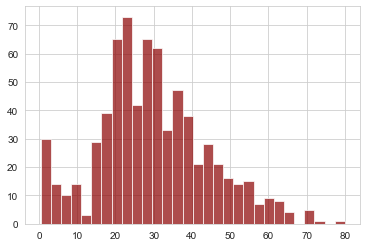

In [45]:
df['age'].hist(bins=30,color='darkred',alpha=0.7)

<AxesSubplot:xlabel='age', ylabel='fare'>

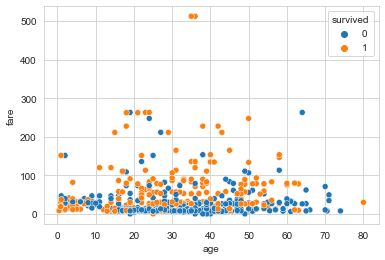

In [46]:
sns.scatterplot(x='age',y='fare',hue='survived',data=df)

# **Data Cleaning**

<AxesSubplot:xlabel='pclass', ylabel='age'>

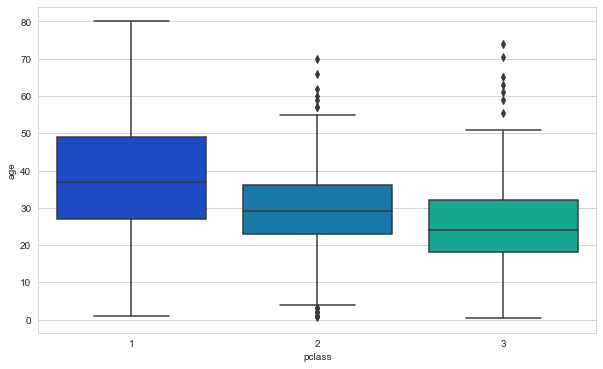

In [47]:
plt.figure(figsize=(10,6))
# sns.boxenplot(x='pclass',y='age',data=df,palette='winter')
sns.boxplot(x='pclass',y='age',data=df,palette='winter')

we can see the weather passangers in the first class tends to be older,which makes sense.We'll use these averages age values to impute based on pclass for Age.  

#### Now to handle missing values, you can fill it by impute function

In [48]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]

    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [49]:
# now apply the function to the dataframe
df['age'] = df[['age','pclass']].apply(impute_age,axis=1)

<AxesSubplot:>

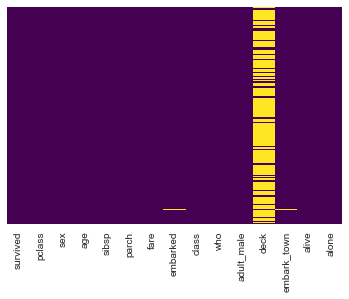

In [50]:
# now you can see the heatmap again
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [51]:
df.drop('deck',axis=1,inplace=True)

<AxesSubplot:>

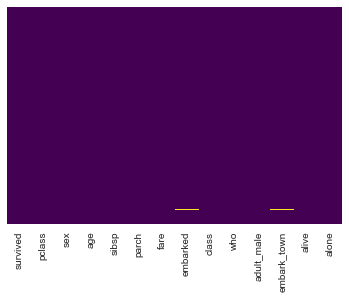

In [52]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [53]:
df.dropna(inplace=True)

<AxesSubplot:>

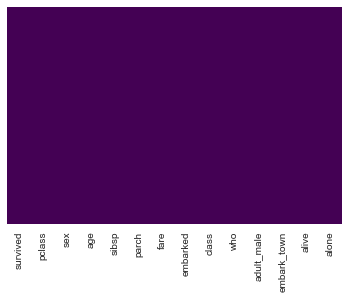

In [54]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

# **Feature engineering**

- converting categorical variables to dummies for modeling, otherwise they will be treated as numerical variables

In [55]:
# convert
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     889 non-null    int64   
 1   pclass       889 non-null    int64   
 2   sex          889 non-null    object  
 3   age          889 non-null    float64 
 4   sibsp        889 non-null    int64   
 5   parch        889 non-null    int64   
 6   fare         889 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        889 non-null    category
 9   who          889 non-null    object  
 10  adult_male   889 non-null    bool    
 11  embark_town  889 non-null    object  
 12  alive        889 non-null    object  
 13  alone        889 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(5)
memory usage: 86.1+ KB


In [56]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


### **dumies** conversion

In [66]:
df=pd.get_dummies(df, columns=['sex','embarked','class','who','adult_male','embark_town','alive','alone'], drop_first=True)

In [67]:
df.head()

,survived,pclass,age,sibsp,parch,fare,sex_male,embarked_Q,embarked_S,class_Second,class_Third,who_man,who_woman,adult_male_True,embark_town_Queenstown,embark_town_Southampton,alive_yes,alone_True
0,0,3,22.0,1,0,7.2500,1,0,1,0,1,1,0,1,0,1,0,0
1,1,1,38.0,1,0,71.2833,0,0,0,0,0,0,1,0,0,0,1,0
2,1,3,26.0,0,0,7.9250,0,0,1,0,1,0,1,0,0,1,1,1
3,1,1,35.0,1,0,53.1000,0,0,1,0,0,0,1,0,0,1,1,0
4,0,3,35.0,0,0,8.0500,1,0,1,0,1,1,0,1,0,1,0,1


In [68]:
df.columns

Index(['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare', 'sex_male',
       'embarked_Q', 'embarked_S', 'class_Second', 'class_Third', 'who_man',
       'who_woman', 'adult_male_True', 'embark_town_Queenstown',
       'embark_town_Southampton', 'alive_yes', 'alone_True'],
      dtype='object')

# **Model Building**

In [69]:
from sklearn.model_selection import train_test_split

In [70]:
X=df.drop(['survived'],axis=1)
y=df['survived']

In [89]:
# splitting into test,train
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

- Training And Prediction

In [90]:
from sklearn.linear_model import LogisticRegression

In [91]:
X

,pclass,age,sibsp,parch,fare,sex_male,embarked_Q,embarked_S,class_Second,class_Third,who_man,who_woman,adult_male_True,embark_town_Queenstown,embark_town_Southampton,alive_yes,alone_True
0,3,22.0,1,0,7.2500,1,0,1,0,1,1,0,1,0,1,0,0
1,1,38.0,1,0,71.2833,0,0,0,0,0,0,1,0,0,0,1,0
2,3,26.0,0,0,7.9250,0,0,1,0,1,0,1,0,0,1,1,1
3,1,35.0,1,0,53.1000,0,0,1,0,0,0,1,0,0,1,1,0
4,3,35.0,0,0,8.0500,1,0,1,0,1,1,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,1,0,1,1,0,1,0,1,0,1,0,1
887,1,19.0,0,0,30.0000,0,0,1,0,0,0,1,0,0,1,1,1
888,3,24.0,1,2,23.4500,0,0,1,0,1,0,1,0,0,1,0,0
889,1,26.0,0,0,30.0000,1,0,0,0,0,1,0,1,0,0,1,1


In [92]:
model=LogisticRegression()
model.fit(X_train,y_train)

c:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [93]:
# make predictions on the test set
predictions=model.predict(X_test)
predictions

array([0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1], dtype=int64)

In [94]:
# Evaluation
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       105
           1       1.00      1.00      1.00        73

    accuracy                           1.00       178
   macro avg       1.00      1.00      1.00       178
weighted avg       1.00      1.00      1.00       178



In [95]:
# confusion matrix
print(confusion_matrix(y_test,predictions))

[[105   0]
 [  0  73]]


In [96]:
# accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)

1.0

In [97]:
# precision
from sklearn.metrics import precision_score
precision_score(y_test,predictions)

1.0

<AxesSubplot:>

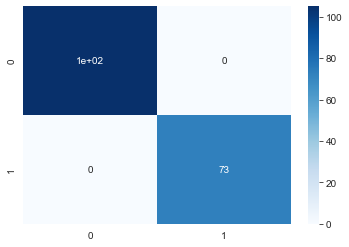

In [98]:
# heatmap
sns.heatmap(confusion_matrix(y_test,predictions),annot=True,cmap='Blues')

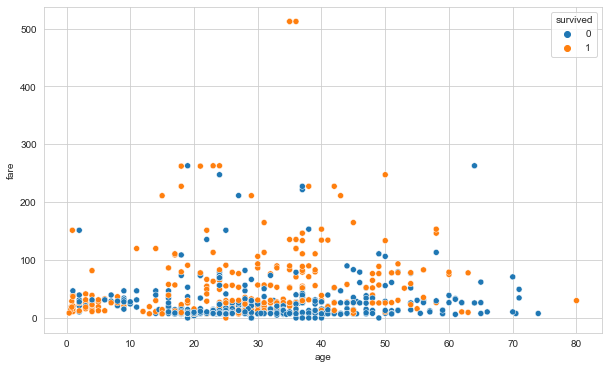

In [81]:
# plot results
plt.figure(figsize=(10,6))
sns.scatterplot(x='age',y='fare',hue='survived',data=df)
plt.show()